# Bank Marketing for Portuguese Banking Institution

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data sets

In [2]:
train_data = pd.read_csv('C://Users//JCCLI//Downloads//bank-additional.csv', sep = ';')
full_data = pd.read_csv('C://Users//JCCLI//Downloads//bank-additional-full.csv', sep = ';')

In [3]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# check for duplicates
duplicates = full_data[full_data.duplicated()]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [6]:
# drop duplicates
full_data.drop_duplicates()
train_data.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [7]:
# Add new dummy variable for the y variable column
full_data['term_deposit'] = np.where(full_data['y'].isin(['yes']),1,0)

In [10]:
full_data.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Introductory Exploratory Analysis

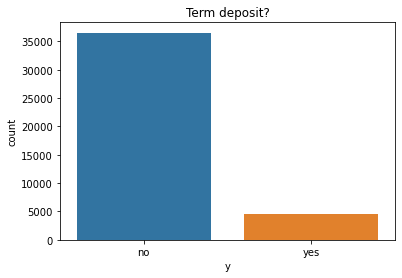

In [8]:
sns.countplot(x = 'y', data = full_data)
plt.title("Term deposit?")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1daaa006970>,
 'caps': [<matplotlib.lines.Line2D at 0x1daaa006fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daaa0066a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1daaa0194f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daaa0197c0>],
 'means': []}

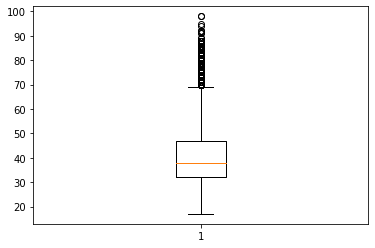

In [9]:
plt.boxplot(x = "age", data = full_data)

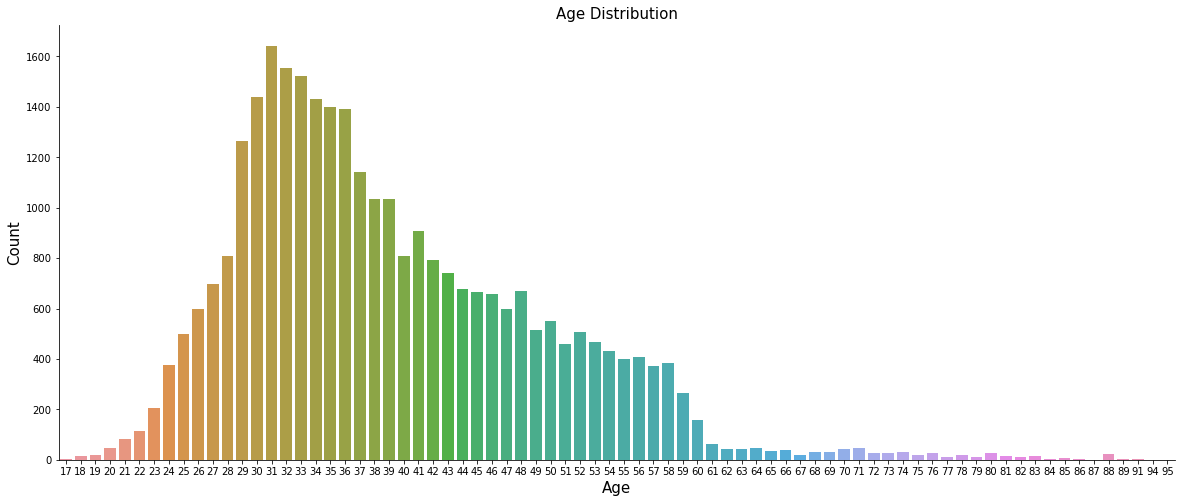

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = full_data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

<AxesSubplot:xlabel='count', ylabel='job'>

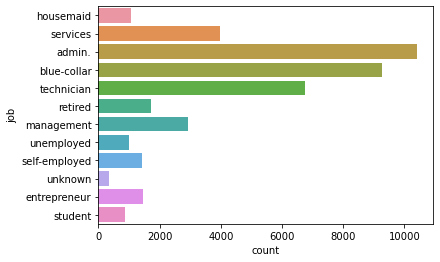

In [17]:
sns.countplot(y = 'job', data = full_data)

In [10]:
# Remove observations with "unknown"
for x in full_data:
    full_data.drop(full_data.loc[full_data[x]== "unknown"].index, inplace=True)

<AxesSubplot:xlabel='count', ylabel='job'>

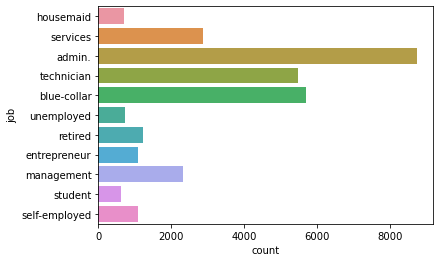

In [11]:
sns.countplot(y = 'job', data = full_data)

<AxesSubplot:xlabel='marital', ylabel='count'>

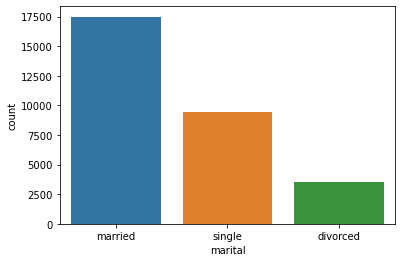

In [12]:
sns.countplot(x = 'marital', data = full_data)

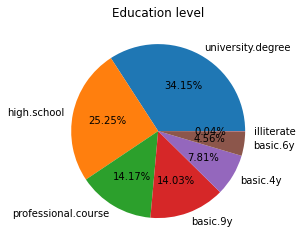

In [13]:
plt.figure()
plt.pie(full_data['education'].value_counts().values, labels = full_data['education'].value_counts().index,autopct='%1.2f%%')
plt.title("Education level")
plt.show()

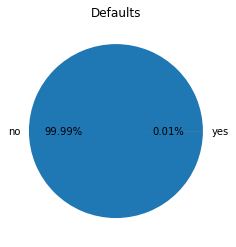

In [14]:
plt.figure()
plt.pie(full_data['default'].value_counts().values, labels = full_data['default'].value_counts().index,autopct = '%1.2f%%')
plt.title("Defaults")
plt.show()

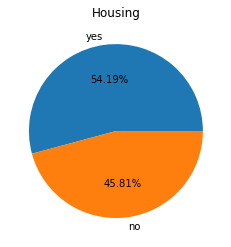

In [15]:
plt.figure()
plt.pie(full_data['housing'].value_counts().values, labels = full_data['housing'].value_counts().index,autopct = '%1.2f%%')
plt.title("Housing")
plt.show()

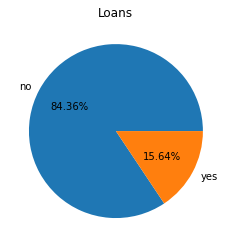

In [16]:
plt.figure()
plt.pie(full_data['loan'].value_counts().values, labels = full_data['loan'].value_counts().index,autopct = '%1.2f%%')
plt.title("Loans")
plt.show()

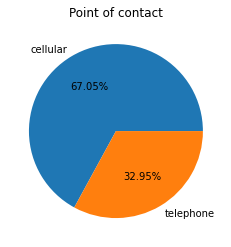

In [17]:
plt.figure()
plt.pie(full_data['contact'].value_counts().values, labels = full_data['contact'].value_counts().index,autopct = '%1.2f%%')
plt.title("Point of contact")
plt.show()

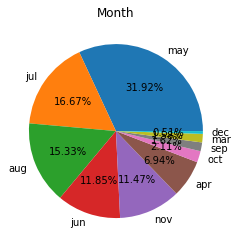

In [18]:
plt.figure()
plt.pie(full_data['month'].value_counts().values, labels = full_data['month'].value_counts().index,autopct = '%1.2f%%')
plt.title("Month")
plt.show()

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

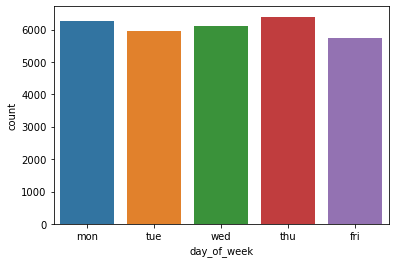

In [19]:
sns.countplot(x = 'day_of_week', data = full_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1daa623a3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1daa623a940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daa623a0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1daa623aee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daa62491f0>],
 'means': []}

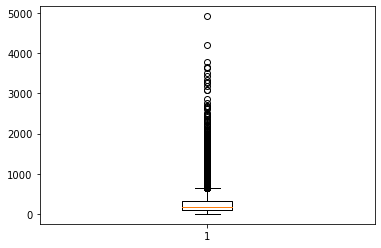

In [20]:
plt.boxplot(x = "duration", data = full_data)

In [26]:
full_data['duration'] = full_data['duration'].astype('int')

(array([2.219e+03, 4.912e+03, 5.098e+03, 4.239e+03, 3.174e+03, 2.326e+03,
        1.682e+03, 1.321e+03, 9.990e+02, 7.500e+02, 5.750e+02, 5.200e+02,
        4.330e+02, 3.440e+02, 2.970e+02, 2.260e+02, 2.130e+02, 1.530e+02,
        1.320e+02, 1.120e+02, 1.090e+02, 8.900e+01, 8.500e+01, 7.200e+01,
        6.300e+01, 3.800e+01, 3.700e+01, 4.800e+01, 2.600e+01, 2.900e+01,
        2.000e+01, 2.000e+01, 1.800e+01, 9.000e+00, 1.200e+01, 6.000e+00,
        8.000e+00, 8.000e+00, 5.000e+00, 8.000e+00, 7.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

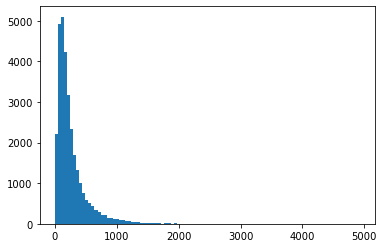

In [29]:
plt.hist(x = 'duration', data = full_data, bins = 100)